In [35]:
!pip install langchain
!pip install xmltodict
!pip install WordCloud

Number of retrieved papers: 150


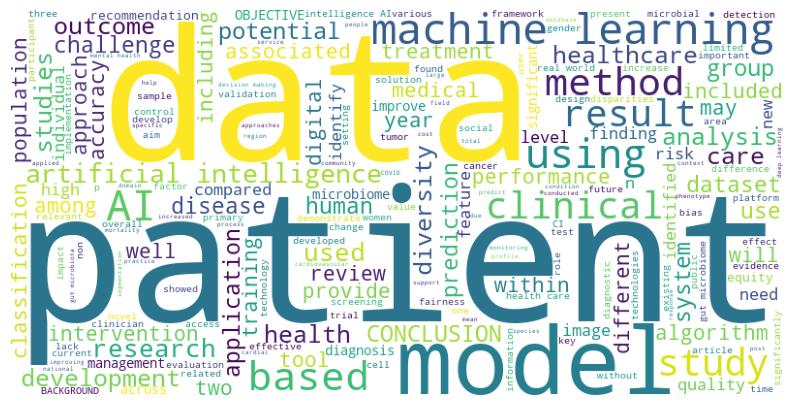

In [70]:
from langchain.retrievers import PubMedRetriever
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Initialize PubMedRetriever with a maximum of 150 results
retriever = PubMedRetriever(top_k_results=150)
# Define the PubMed query
query = """("machine learning" OR "artificial intelligence" OR "ML") AND
("healthcare" OR "health") AND 
("diversity" OR "equity" OR "equality")"""
# Retrieve relevant documents from PubMed
papers = retriever.get_relevant_documents(query)
# Check the number of retrieved papers
print(f"Number of retrieved papers: {len(papers)}")
# Extract titles and page content for each paper and create a text string
text = " ".join([ f"{paper.metadata.get('Title', '')} {paper.page_content} " for paper in papers])
# Generate a WordCloud from the text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [10]:
import requests
from langchain.document_loaders import PubMedLoader

def get_full_text(pmid):
    base_url = "https://www.ncbi.nlm.nih.gov/pmc/utils/idconv/v1.0/"
    params = {
        "ids": pmid,
        "format": "json",
        "versions": "pmc",
    }
    response = requests.get(base_url, params=params)
    data = response.json()
    if "records" in data and data["records"]:
        record = data["records"][0]
        if "pmcid" in record:
            pmcid = record["pmcid"]
            full_text_url = f"https://www.ncbi.nlm.nih.gov/pmc/articles/{pmcid}/pdf/"
            return full_text_url
    return None

# Example usage
query = "your search query"  # Replace with the actual query you want to search for in PubMed
loader = PubMedLoader(query, load_max_docs=1)
docs = loader.load()

for doc in docs:
    print("Title:", doc.metadata.get('Title', ''))
    print("Published:", doc.metadata.get('Published', ''))
    print("Abstract:", doc.metadata.get('Abstract', ''))
    
    # Print all metadata
    print("Metadata:")
    for key, value in doc.metadata.items():
        print(f"{key}: {value}")
    
    pmid = doc.metadata.get('pmcid', '')
    full_text_url = get_full_text(pmid)
    if full_text_url:
        print("Full Text URL:", full_text_url)
    else:
        print("Full text not available.")
    
    print()

Title1: Living in the Era of an Ideological Climate of Globalisation: A Study of Psychological Sense of Community Among Young and Older Adults in Two Cultures (India and Norway). Challenges for Community Psychology and the Applied Social Sciences.
Published1: 2021-07-28
Abstract: 
Metadata:
uid: 34393957
Title: Living in the Era of an Ideological Climate of Globalisation: A Study of Psychological Sense of Community Among Young and Older Adults in Two Cultures (India and Norway). Challenges for Community Psychology and the Applied Social Sciences.
Published: 2021-07-28
Copyright Information: Copyright © 2021 Bahl, Nafstad, Blakar and Langvik.
Full text not available.

